### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [377]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('vehicle.csv').dropna()
data.head().T

,0,1,2,3,4
compactness,95,91,104,93,85
circularity,48,41,50,41,44
distance_circularity,83,84,106,82,70
radius_ratio,178,141,209,159,205
pr.axis_aspect_ratio,72,57,66,63,103
max.length_aspect_ratio,10,9,10,9,52
scatter_ratio,162,149,207,144,149
elongatedness,42,45,32,46,45
pr.axis_rectangularity,20,19,23,19,19
max.length_rectangularity,159,143,158,143,144


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [378]:
data['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

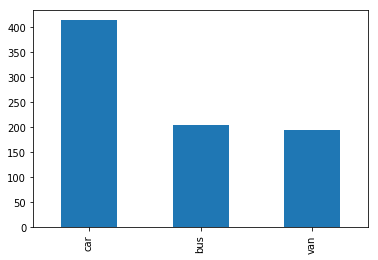

In [379]:
pd.value_counts(data['class']).plot(kind = 'bar')

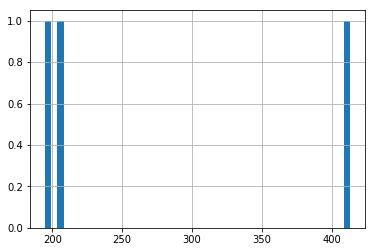

In [380]:
pd.value_counts(data['class']).hist(bins=50)

### Check for any missing values in the data 

In [381]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [382]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 3. Standardize the data 

In [383]:
# As class column contains strings, let us drop that column
revised_data = data.drop('class', axis=1)

In [384]:
revised_data.info()
revised_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [385]:
from scipy.stats import zscore
revised_data.apply(zscore)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [386]:
distortion=[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [387]:
from sklearn.cluster import KMeans

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [388]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(1,10):
    
    # Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10)
    
    # Fit on the data
    km.fit(revised_data)
    
    # Add cluster information for each record in dataframe
    # revised_data['k_' + str(i)] = 
    km.predict(revised_data)
    
    # Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]
    distortion.append(km.inertia_)

    
# print(sse_df)
distortion

[29176170.95202952,
 6905476.542837899,
 4610990.902189038,
 3333252.1229019524,
 2288296.7743309983,
 1823916.3977177646,
 1601418.475269584,
 1465418.5534751462,
 1308867.8157219996]

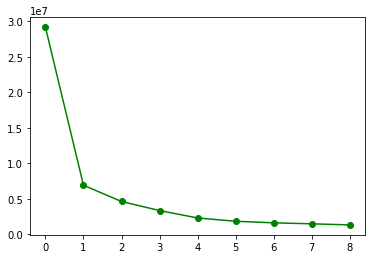

In [389]:
import matplotlib.pyplot as plt
plt.plot(distortion, 'go-')

### 6. Plotting Elbow/ Scree Plot

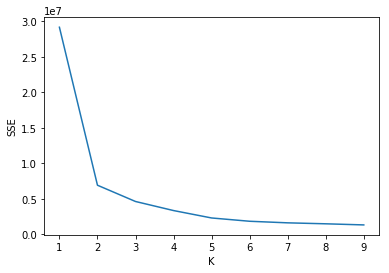

In [390]:
import seaborn as sns
sns.lineplot(x='K', y='SSE', data=sse_df)

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [391]:
# As seen from the above elbow plot, the optimal value of K could be considered as either 2 or 3 or 4. Since the 
# steep downfall happens at 2, somewhat steep at 3 and 4 and subsequently the downfall is not that steep, 
# the optimal value of K could be considered as 3 or 4.
# We use K as 3

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a47c966d8>,
      dtype=object)

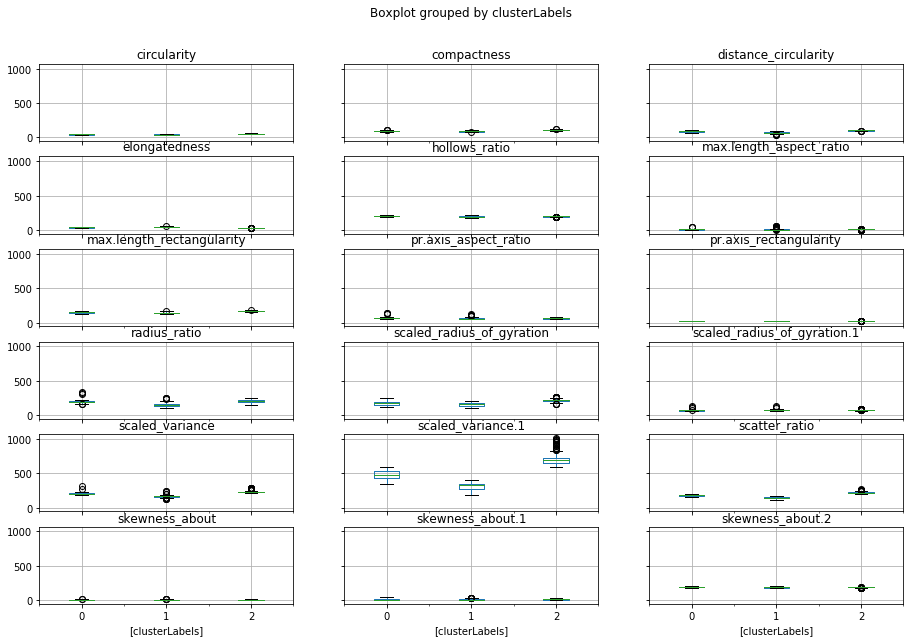

In [392]:
# Using k = 3
km1 = KMeans(n_clusters=3)
km1.fit(revised_data)

colnames = revised_data.columns

revised_data['clusterLabels'] = km1.predict(revised_data);
revised_data.boxplot(by="clusterLabels", layout=(6, 3), figsize=(15, 10))
# prediced_cluster_labels = pd.DataFrame(km1.predict(revised_data), columns=['clusterLabels'])
# prediced_cluster_labels

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [393]:
centroids = km1.cluster_centers_

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [394]:
centroids_df = pd.DataFrame(centroids, columns=colnames)

Hint: Use pd.Dataframe function 

In [395]:
centroids_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,96.219178,44.972603,88.116438,195.520548,65.500000,8.945205,179.102740,36.732877,21.191781,146.794521,202.363014,485.780822,174.595890,69.130137,5.904110,13.924658,193.719178,200.335616
1,88.324034,41.206009,71.182403,146.615880,60.465665,7.963519,144.268240,46.757511,18.701717,140.263948,166.010730,310.313305,157.118026,73.399142,6.079399,10.912017,187.916309,193.982833
2,104.159204,53.019900,102.810945,202.029851,62.104478,9.820896,217.233831,30.706468,24.402985,166.373134,230.074627,700.870647,213.726368,72.457711,7.308458,15.905473,188.000000,196.432836


### Use kmeans.labels_ function to print out the labels of the classes

In [396]:
km1.labels_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2,
       1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [397]:
import numpy as np
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [398]:
concatenated_array = np.concatenate((a, b, c), axis=0)
df = pd.DataFrame(concatenated_array, columns=['col1', 'col2'])
df.shape

(250, 2)

In [399]:
df

,col1,col2
0,9.834047,-2.584937
1,9.688802,2.112912
2,10.620584,-2.876540
3,11.961574,-0.858812
4,11.875482,1.052777
5,8.357775,-0.180887
6,11.037418,-1.082668
7,8.704651,2.343881
8,11.622249,3.253419
9,12.935003,0.945101


### 10. Use scatter matrix to print all the 3 distributions

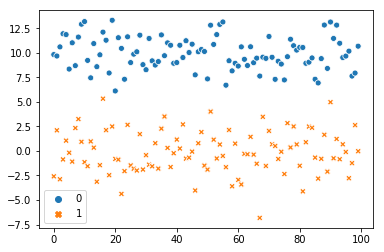

In [400]:
sns.scatterplot(data=a)

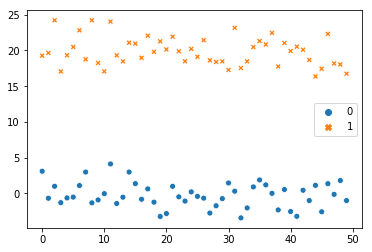

In [401]:
sns.scatterplot(data=b)

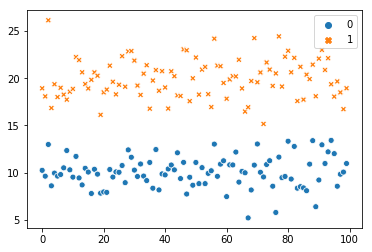

In [402]:
sns.scatterplot(data=c)

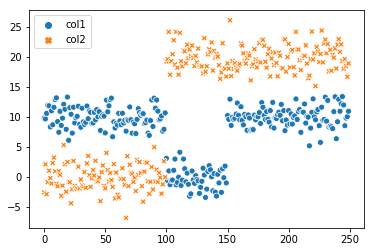

In [403]:
sns.scatterplot(data=df)

### 11. Find out the linkage matrix

In [404]:
colnames = df.columns


from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df)
df.columns = colnames

df

,col1,col2
0,0.423917,-1.442790
1,0.391028,-0.974466
2,0.602023,-1.471860
3,0.905681,-1.270714
4,0.886186,-1.080150
5,0.089626,-1.203133
6,0.696412,-1.293030
7,0.168174,-0.951441
8,0.828843,-0.860770
9,1.126107,-1.090884


In [405]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
model.fit(df)
df['labels'] = model.labels_

In [406]:
df.groupby(["labels"]).count()

,col1,col2
labels,,
0,150,150
1,100,100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a490dbb70>,
      dtype=object)

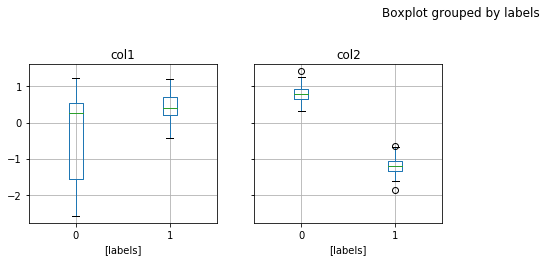

In [407]:
df.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

Use ward as linkage metric and distance as Eucledian

In [408]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z , pdist(df))
c

0.8993031466157592

In [409]:
distDf = pd.DataFrame(list(coph_dists), columns=['clusterDist'])
distDf['euclidianDist'] = pdist(df)
distDf.head(5)

,clusterDist,euclidianDist
0,2.151828,0.469477
1,0.510379,0.180462
2,1.048509,0.511572
3,3.837629,0.587537
4,2.151828,0.411323


In [410]:
distDf.corr()

,clusterDist,euclidianDist
clusterDist,1.000000,0.899303
euclidianDist,0.899303,1.000000


### 12. Plot the dendrogram for the consolidated dataframe

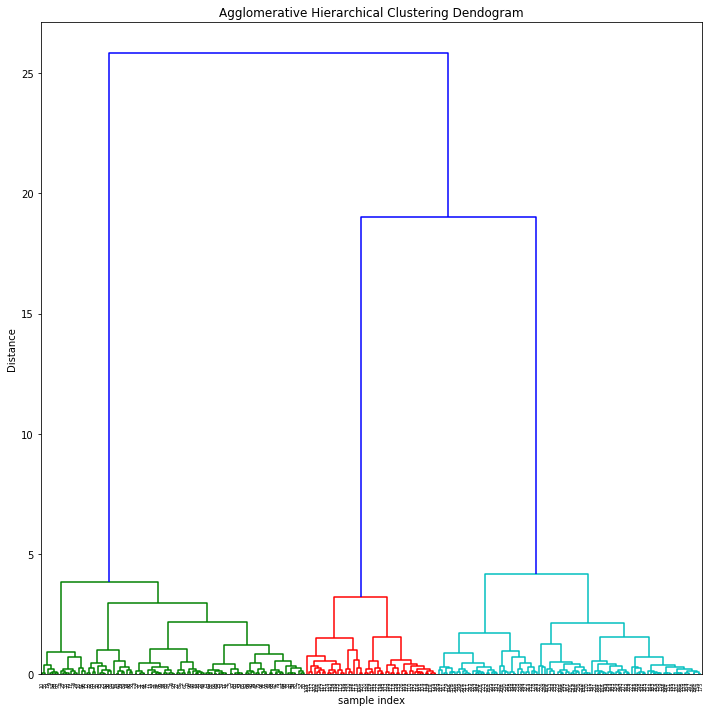

In [411]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

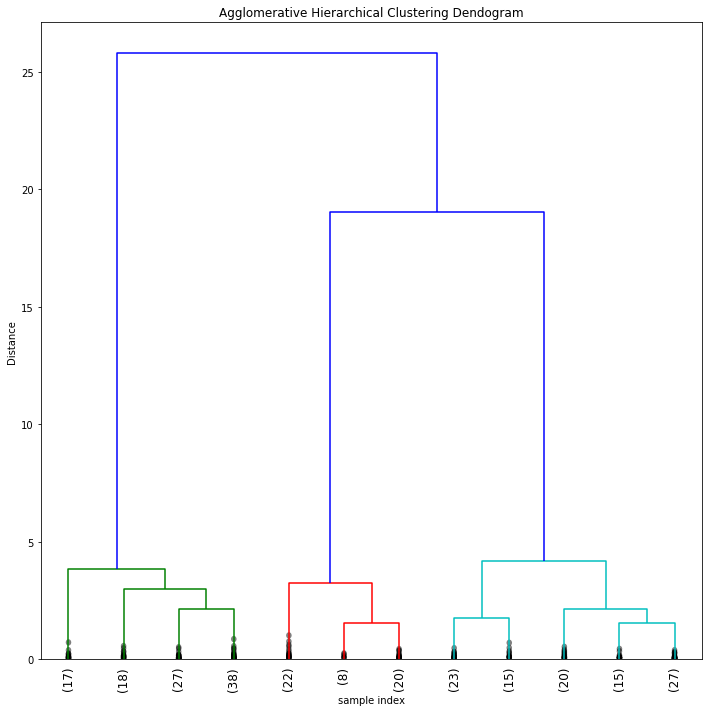

In [412]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=12, 
           truncate_mode='lastp', 
           leaf_rotation=90, 
           show_contracted=True)
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

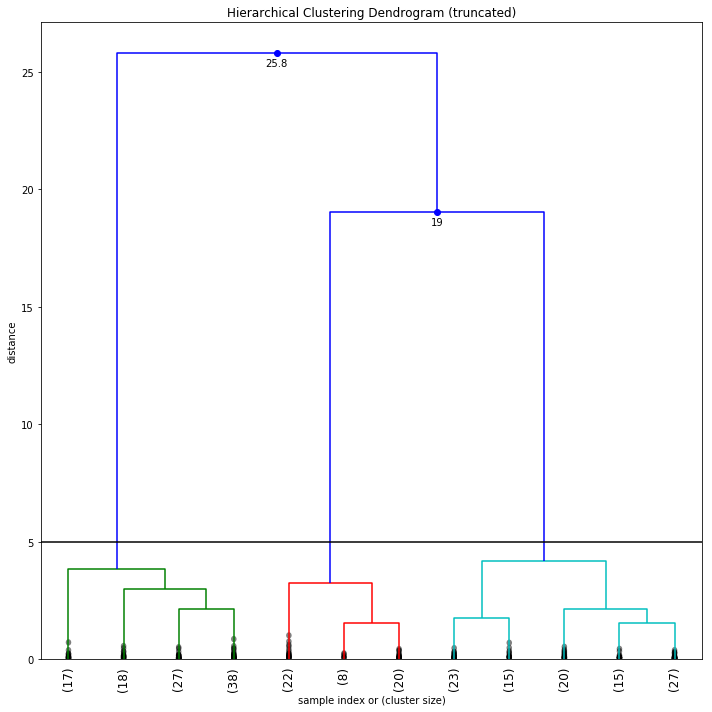

In [413]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
fancy_dendrogram(Z, p=12, 
           truncate_mode='lastp', 
           leaf_rotation=90, 
           show_contracted=True, 
           annotate_above=10,
           max_d=5)
plt.tight_layout()

In [414]:
# As we see maximum drop / jump after 5 (on the y-axis), we will cut near 5 and it will show us
# 3 clusters

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [415]:
from scipy.cluster.hierarchy import fcluster
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

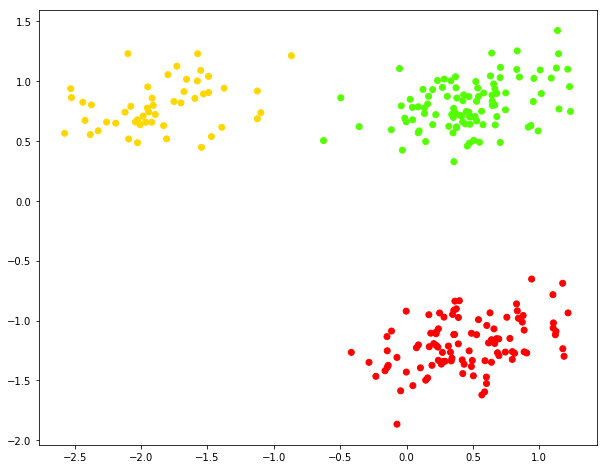

In [416]:
plt.figure(figsize=(10, 8))
plt.scatter(df['col1'], df['col2'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()